In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

Load training data from keras dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

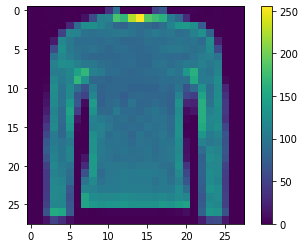

In [3]:
plt.imshow(train_images[37])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values are <0,255>. Due to performance reasons it is worth to normalize <0,1>

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

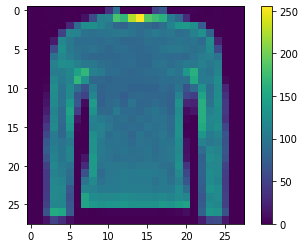

In [4]:
plt.imshow(train_images[37])
plt.colorbar()
plt.grid(False)
plt.show()

Introduce label naming and label some of them

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

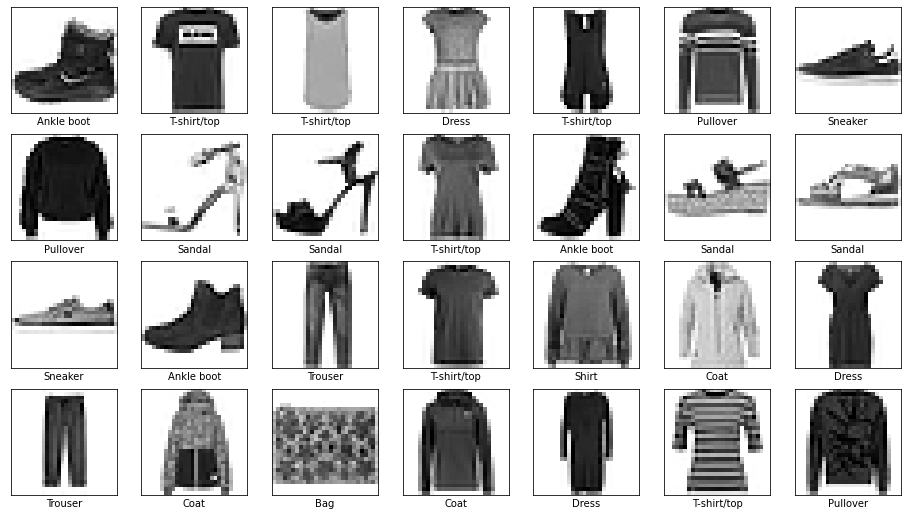

In [6]:
plt.figure(figsize=(16,16))
for i in range(28):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Prepare model: 1x input layer, 1x hidden layer with Rectified Linear Unit activation function, 1x output layer

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train model

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 501us/step - loss: 2.4953 - accuracy: 0.6657
Epoch 2/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.7042 - accuracy: 0.7384
Epoch 3/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.5850 - accuracy: 0.7949
Epoch 4/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.5475 - accuracy: 0.8096
Epoch 5/10
1875/1875 [==============================] - 1s 500us/step - loss: 0.5208 - accuracy: 0.8226
Epoch 6/10
1875/1875 [==============================] - 1s 502us/step - loss: 0.4970 - accuracy: 0.8311
Epoch 7/10
1875/1875 [==============================] - 1s 500us/step - loss: 0.4909 - accuracy: 0.8342
Epoch 8/10
1875/1875 [==============================] - 1s 507us/step - loss: 0.4846 - accuracy: 0.8359
Epoch 9/10
1875/1875 [==============================] - 1s 501us/step - loss: 0.4775 - accuracy: 0.8399
Epoch 10/10
1875/1875 [==============================] - 1s 527u

Test accuracy with validation data

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5749 - accuracy: 0.8115

Test accuracy: 0.8115000128746033


Save and convert model to tensorflow lite to be used in android

In [12]:
import tensorflow as tf

model.save("clothes-model.h5")
saved_model = tf.keras.models.load_model('clothes-model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(saved_model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp28y0t0u6/assets


408504

In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [29]:
predictions[33]

array([2.32569408e-02, 3.06816027e-02, 1.68527337e-03, 9.17566359e-01,
       1.00493077e-02, 6.83426892e-16, 1.53406467e-02, 0.00000000e+00,
       1.41986541e-03, 1.03473255e-17], dtype=float32)

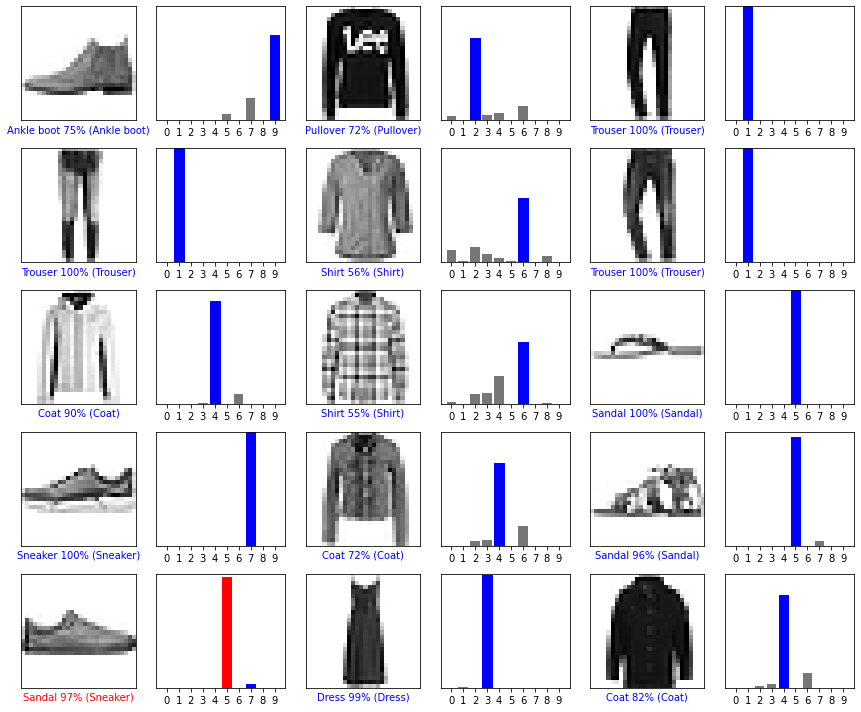

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()